<a href="https://colab.research.google.com/github/mlau239/knn/blob/main/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 68 (delta 20), reused 8 (delta 8), pack-reused 39 (from 1)
Receiving objects: 100% (68/68), 13.54 MiB | 15.58 MiB/s, done.
Resolving deltas: 100% (25/25), done.


**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [4]:
#1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

import numpy as np
import pandas as pd

df = pd.read_csv('./knn/data/USA_cars_datasets.csv')
df = df.loc[:,['price','year','mileage'] ]
print(df.shape)
print(df.describe())
df.head()
# There are no `nan`s, since there are 2499 observations of each variable, and 2499 rows in the dataset.

(2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [5]:
#2. Maxmin normalize `year` and `mileage`.

def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

In [6]:
#3. Split the sample into ~80% for training and ~20% for evaluation.

from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop('price',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

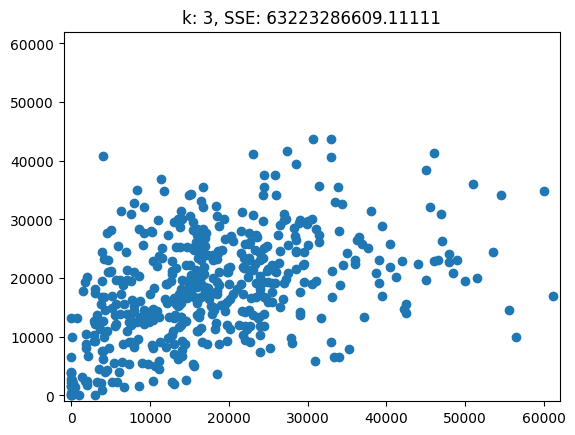

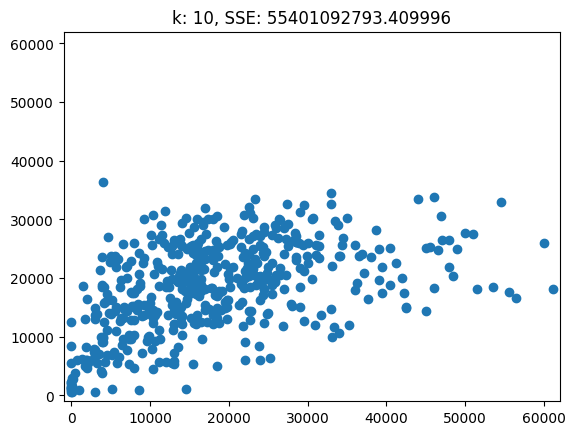

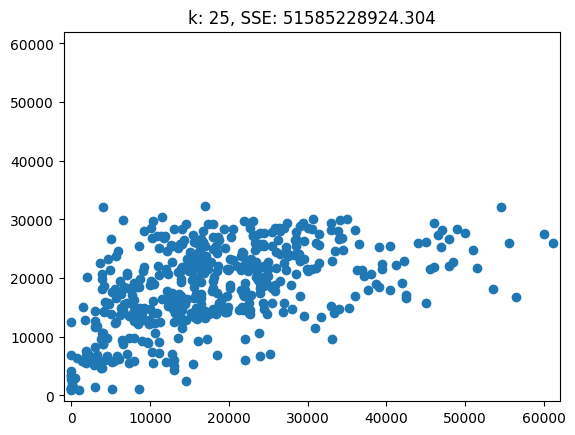

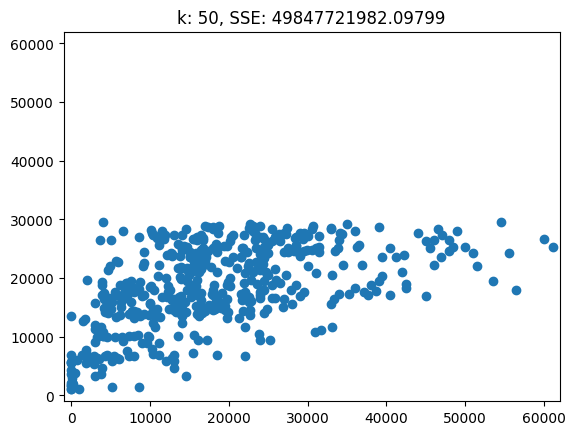

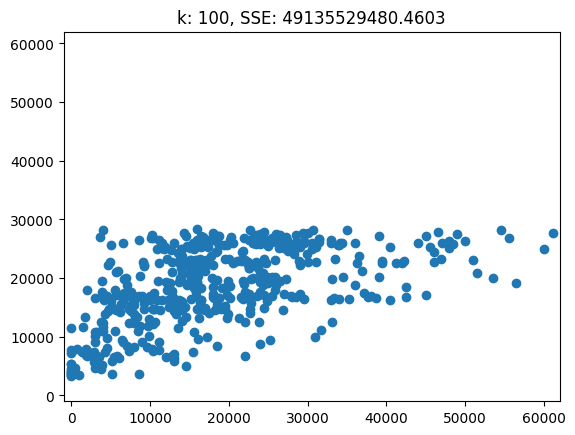

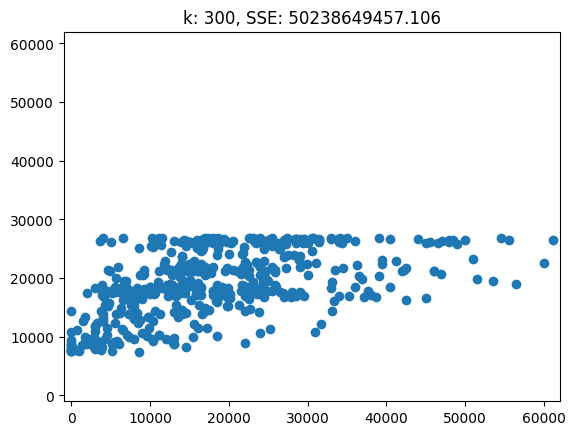

In [7]:
#4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    #
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()
#> The range of predicted values flattens, and the variability of predictions onditional on price shrinks.

[77]


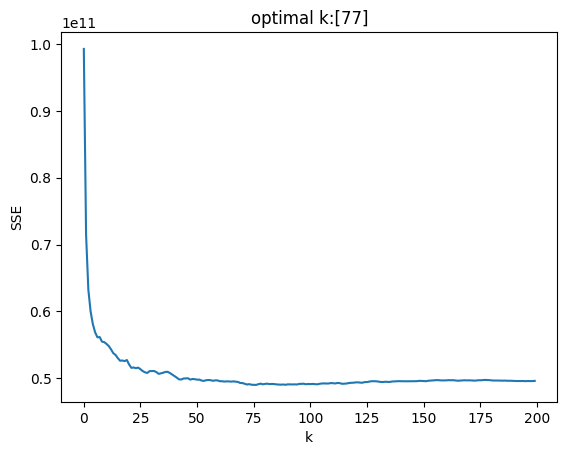

In [8]:
#5. Determine the optimal $k$ for these data.

k_bar = 200
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

6. The optimal \( k \) is approximately 77, so at \( k = 300 \), the model is likely overfitting, while at \( k = 3 \), 10, and 25, it is underfitting. For \( k = 50 \) and \( k = 100 \), the predictions are fairly accurate.

At \( k = 300 \), we notice a pattern of horizontal clustering, where the most common values begin to dominate, causing the predictions to group into horizontal bands. This is an unnatural consequence of overfitting, especially given that the data is evenly distributed.

On the other hand, with smaller \( k \) values like 3, the predictions show high variance and low precision. As \( k \) increases, the range of predictions narrows—outlier values have less influence, and the predictions gravitate towards the average.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

Index(['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'class'],
      dtype='object')
(101, 18)
['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']
['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse' 'sole' 'stingray' 'tuna']
['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'vulture' 'wren']
['clam' 'crab' 'crayfish' 'lobster' 'octopus' 'scorpion' 'seawasp' 'slug'
 'starfish' 'worm']
['fl

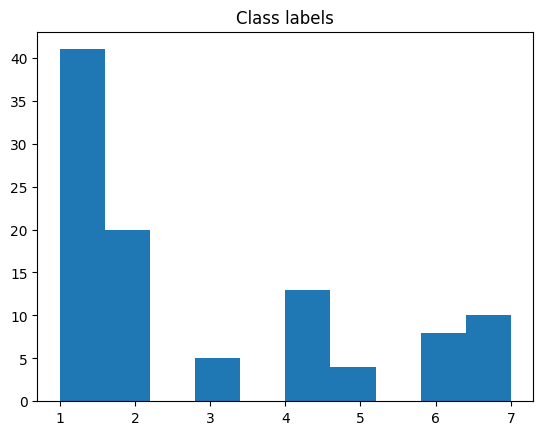

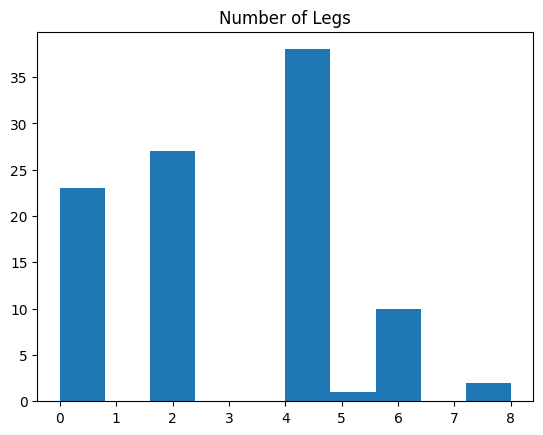

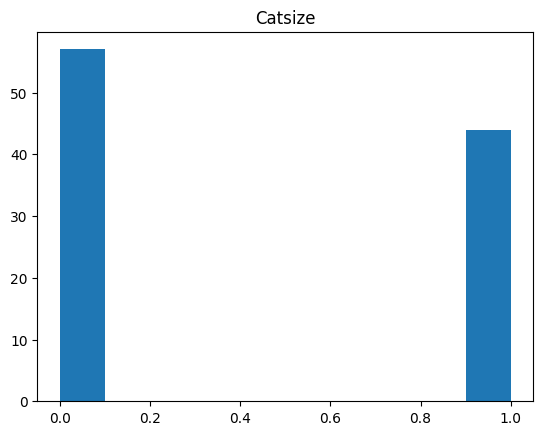

0.9019607843137255
[1]


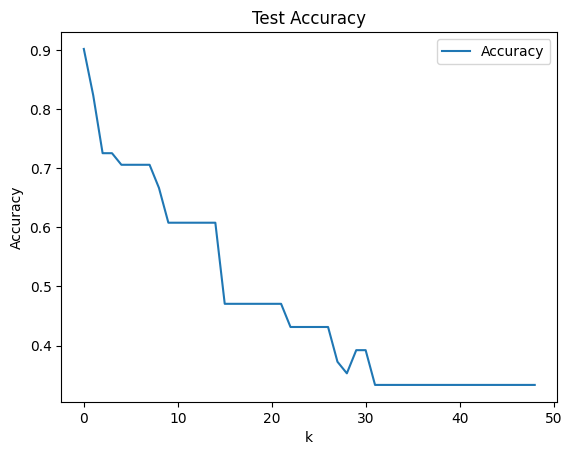

All variables, confusion table: class   1  2  3  4  5  6  7
row_0                      
1      17  0  1  0  0  0  0
2       0  9  0  0  0  0  0
3       0  0  1  0  0  0  0
4       0  0  1  7  0  0  0
5       0  0  1  0  3  0  0
6       0  0  0  0  0  5  2
7       0  0  0  0  0  0  4
0.7450980392156863
[1 2 3 4 5 6]


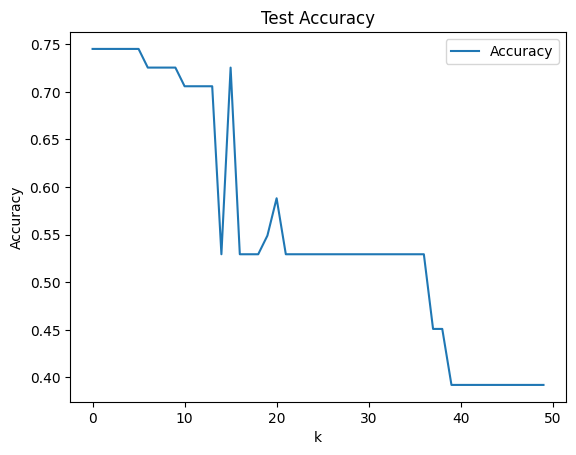

Confusion table: class   1  2  3  4  5  6  7
row_0                      
1      20  0  0  0  0  0  0
2       0  7  0  0  0  2  0
3       0  1  2  0  0  1  2
4       0  1  1  9  2  0  3
Notice how many classes are empty in the confusion table.
[[0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?

df = pd.read_csv('./knn/data/zoo.csv')
print(df.columns)
print(df.shape)
df.head()

classes = list(df['class'].unique())
[ print(df.loc[ df['class'] == item, 'animal'].unique()) for item in classes]

#> There's a large chordate class for 1, fish in 2, birds in 3, miscellaneous sea creatures in 4, bugs in 5, reptiles in 6, and tube creatures in 7.

df['class'].hist(grid=False)
plt.title('Class labels')
plt.show()

df['legs'].hist(grid=False)
plt.title('Number of Legs')
plt.show()

df['catsize'].hist(grid=False)
plt.title('Catsize')
plt.show()

#2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

## Select data:
x_vars = df.columns.tolist()
y = df['class']
x_vars.remove('animal')
x_vars.remove('class')
X = df.loc[:,x_vars]
X.describe()

## Split the sample:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.5,
                                                    random_state=125)

#3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.

from sklearn.neighbors import KNeighborsClassifier

## Solve for k that maximizes accuracy:
N_train = len(y_train)
N_test = len(y_test)
k_bar = N_train-1 # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(Acc_max)
print(k_star)

## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

# k is selected based on the value that maximizes the accuracy on the testing data, ensuring the best balance between underfitting (small k) and overfitting (large k)

#4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?

## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = fitted_model.predict(X_test.values) # Predict values for test set

## Confusion Table:
print('All variables, confusion table:', pd.crosstab(y_hat, y_test))

#Mistakes can be interpreted from the off-diagonal elements of the confusion matrix, which represent misclassifications. They can be interpretted by
#Class imbalance: If certain groups have fewer data points, the model may struggle to predict them accurately due to limited representation in the training set.
#Similarity between classes: Some groups may share features that cause confusion, leading the model to misclassify one group as another.


#5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

## Select data:
x_vars = ['milk','aquatic','airborne']

y = df['class'] # Target variable
X = df.loc[:,x_vars] # Create feature matrix

## Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5)#, # Split the sample 80 train/ 20 test
                                                    #random_state=200) # For replication purposes
N_train = len(y_train)
N_test = len(y_test)

## Solve for k that maximizes accuracy:
k_bar = N_train # Number of k's to try
Acc = np.zeros(k_bar) # We'll store the accuracy here

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test.values) # Predict values for test set
    Acc[k] = np.sum( y_hat == y_test )/N_test # Accuracy on testing data

Acc_max = np.max(Acc) # Find highest recorded Accuracy
max_index = np.where(Acc==Acc_max) # Find the indices that equal the maximum
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1 # Find the optimal value of k; why index+1?
print(Acc_max)
print(k_star)


## Accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

## Fit optimal model:
model = KNeighborsClassifier(n_neighbors=k_star[0]) # Create a sk model for k
fitted_model = model.fit(X_train.values,y_train) # Train the model on our data
y_hat = model.predict(X_test.values) # Predict values for test set

## Confusion Table:
print('Confusion table:', pd.crosstab(y_hat, y_test))

print('Notice how many classes are empty in the confusion table.')

print( model.predict_proba(X_test.values) )

print('Notice how that, despite those classes being empty, they have non-zero predictive probability.')
print('This is an example of why making hard label classifications can be risky:')
print('you throw away information about the prevalence of "minority classes" that do not have a high likelihood.')

#Despite training on multiple classes, the model may not predict all of them because the classifier tends to favor the most common or dominant classes for this feature set (milk, aquatic, and airborne). This is likely due to limited discriminatory power with just these three features.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.